In [23]:
import pandas as pd

In [24]:
datos = pd.read_csv("./DATABASE DOLAR BLUE EN BOLIVIA - Hoja1.csv")

datos.head()

,PROPIEDAD DE WWW.DOLARBLUEBOLIVIA.CLICK,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,21/07/2024 17:36:42,"6,86","6,96","10,13","10,17"
2,21/07/2024 17:44:16,"6,86","6,96","10,13","10,17"
3,21/07/2024 17:59:16,"6,86","6,96","10,14","10,17"
4,21/07/2024 18:14:15,"6,86","6,96","10,14","10,17"


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   PROPIEDAD DE WWW.DOLARBLUEBOLIVIA.CLICK  38550 non-null  object
 1   Unnamed: 1                               38550 non-null  object
 2   Unnamed: 2                               38550 non-null  object
 3   Unnamed: 3                               38550 non-null  object
 4   Unnamed: 4                               38550 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [26]:
""" cambiamos los nombres de las columnas """

datos.columns = ['fecha_hora', 'oficial_compra', 'oficial_venta', 'paralelo_compra', 'paralelo_venta']

for col in ['oficial_compra', 'oficial_venta', 'paralelo_compra', 'paralelo_venta']:
    datos[col] = datos[col].str.replace(',', '.', regex=False).astype(float)

datos['fecha_hora'] = pd.to_datetime(datos['fecha_hora'], dayfirst=True)

datos.head()


,fecha_hora,oficial_compra,oficial_venta,paralelo_compra,paralelo_venta
0,NaT,NaN,NaN,NaN,NaN
1,2024-07-21 17:36:42,6.86,6.96,10.13,10.17
2,2024-07-21 17:44:16,6.86,6.96,10.13,10.17
3,2024-07-21 17:59:16,6.86,6.96,10.14,10.17
4,2024-07-21 18:14:15,6.86,6.96,10.14,10.17


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha_hora       38550 non-null  datetime64[ns]
 1   oficial_compra   38550 non-null  float64       
 2   oficial_venta    38550 non-null  float64       
 3   paralelo_compra  38550 non-null  float64       
 4   paralelo_venta   38550 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.5 MB


In [31]:
""" separaremos datos de entrenamiento y datos de prueba """

from sklearn.model_selection import train_test_split

train, test = train_test_split(datos, test_size=0.2) 

len(datos), len(train), len(test)

(38551, 30840, 7711)

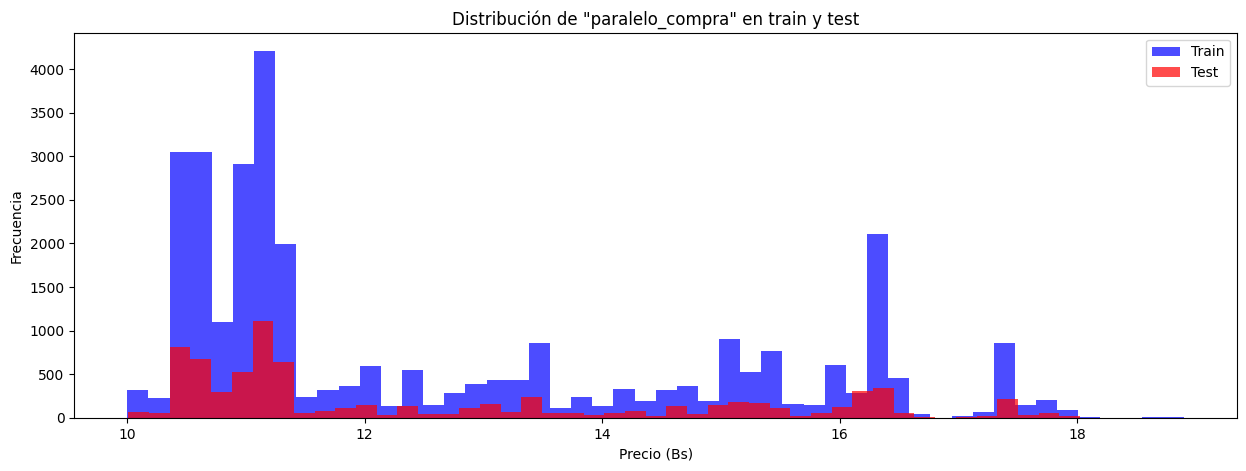

In [34]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
train, test = train_test_split(datos, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 1, 1)

ax.hist(train['paralelo_compra'], bins=50, alpha=0.7, label='Train', color='blue')
ax.hist(test['paralelo_compra'], bins=50, alpha=0.7, label='Test', color='red')

ax.set_title('Distribución de "paralelo_compra" en train y test')
ax.set_xlabel('Precio (Bs)')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)